In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
import cv2


Codigo basado en la implementacion de Karandeep Grover en el Github (https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/1_digits_recognition/digits_recognition_neural_network.ipynb) y la implementación de (https://data-flair.training/blogs/python-deep-learning-project-handwritten-digit-recognition/).

Importacion de datos mnist, division entre par ordenado de entremaniento y par ordenado de conjunto para test el modelo

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

Visualizacion de un solo valor del dataset, escala de colores en matriz para denominar escritura

4

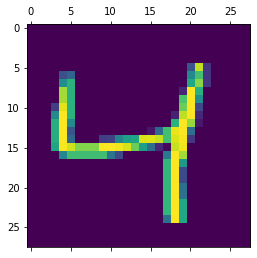

In [3]:
plt.matshow(X_train[2])
y_train[2]

Division por el mayor valor posible(255) blanco puro, reduce la escala de los numeros a valores entre 0-1

In [4]:
X_train = X_train / 255
X_test = X_test / 255

Convertir la matrix en un solo vector columna,2d matrix a 1d matriz

In [5]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

Creacion de modelo

In [6]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 818us/step - loss: 0.4734 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 2s 895us/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.2838 - accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.2663 - accuracy: 0.9259


Medir precision con test set

In [7]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 667us/step - loss: 0.2679 - accuracy: 0.9256


[0.2679140567779541, 0.925599992275238]

Predecir resultados de test

In [8]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Crear matriz de confusion

In [9]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Representacion grafica matriz de confusion

Text(69.0, 0.5, 'Truth')

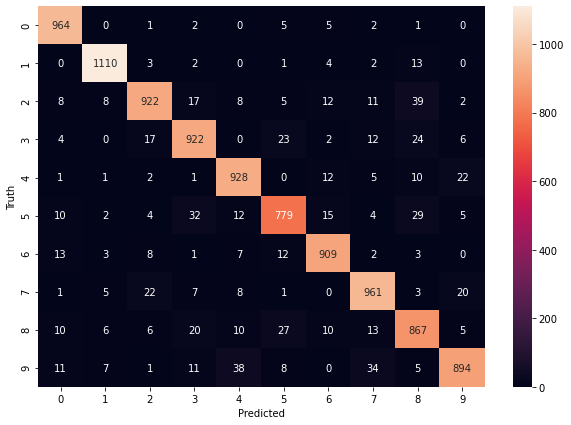

In [10]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Guardar el modelo

In [ ]:
model.save('mnist.h5')

Metodo para ingresar imagenas propias y correrlo por el modelo.

In [11]:
from PIL import ImageGrab, Image , ImageOps
def predict_image(path):
    file = path
    img = Image.open(file)
    img = img.resize((28,28))
    img = img.convert('L')
    img = ImageOps.invert(img)
    plt.matshow(img)
    img = np.array(img)
    img = img.reshape(1,28,28,1)
    img = img/255.0
    res = model.predict([img])[0]
    print(max(res))
    print(np.argmax(res))